In [4]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
data_set= pd.read_csv("C://Users//Hari//Desktop//News Detection//WELFake_Dataset.csv")

In [6]:
data_set.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
data_set.drop("Unnamed: 0",axis =1,inplace =True)

In [8]:
data_set.head(2)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1


In [9]:
# --- Handle Missing Values ---
# Fill any NaN values in 'title' and 'text' with an empty string

df = data_set
df['title'].fillna('', inplace=True)
df['text'].fillna('', inplace=True)

# --- Combine 'title' and 'text' into a new column ---
# We add a space in between to ensure words from title and text don't merge
df['full_text'] = df['title'] + ' ' + df['text']

print("\nDataFrame after combining columns:")
# Display the new 'full_text' column alongside the originals
df[['title', 'text', 'full_text']].head()

C:\Users\Hari\AppData\Local\Temp\ipykernel_19800\4218291346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('', inplace=True)
C:\Users\Hari\AppData\Local\Temp\ipykernel_19800\4218291346.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi


DataFrame after combining columns:


,title,text,full_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",SATAN 2: Russia unvelis an image of its terrif...


In [10]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Handle None values
    if text is None:
        return ""
        
    # 2. Convert to lowercase
    text = text.lower()
    
    # 3. Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

def process_text(text):
    # 1. Tokenize the text
    tokens = word_tokenize(text)
    
    # 2. Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    # 3. Lemmatization (generally preferred over stemming)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # 4. Join the tokens back into a string
    return " ".join(lemmatized_tokens)

# --- Apply the functions to your DataFrame ---

# Replace 'tweet_text' with the name of the column containing your text data
text_column = 'full_text'

# Create a new column with the cleaned text
df['cleaned_text'] = df[text_column].apply(clean_text)

# Create another new column with the fully processed text
df['processed_text'] = df['cleaned_text'].apply(process_text)


# Display the DataFrame with the new columns
print("Data after Cleaning and Processing:")
df[[text_column, 'cleaned_text', 'processed_text']].head()

Data after Cleaning and Processing:


,full_text,cleaned_text,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement on high alert following threat...,law enforcement high alert following threat co...
1,Did they post their votes for Hillary already?,did they post their votes for hillary already,post vote hillary already
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obamas attorney general says most...,unbelievable obamas attorney general say charl...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby jindal raised hindu uses story of christ...,bobby jindal raised hindu us story christian c...
4,SATAN 2: Russia unvelis an image of its terrif...,satan russia unvelis an image of its terrifyi...,satan russia unvelis image terrifying new supe...


# Initialize the NLP tools

stopwords and lemmatizer 

#  Define the cleaning and processing functions 

# clean_and_process the text.

    Step 1: Convert to lowercase
    
    Step 2: Remove punctuation, numbers, and special characters
     
    i.e This keeps only letters and spaces
   
    Step 3: Tokenize the text
    
    Step 4: Remove stop words and lemmatize

    Step 5: Join the tokens back into a string

#  Apply the function to the 'full_text' column 

df['processed_text'] = df['full_text'].apply(clean_and_process)

print("DataFrame after Processing:")
df[['full_text', 'processed_text']].head()

In [11]:
# We keep only the final processed text and the label
final_df = df[['processed_text', 'label']].copy()


print("Final, Cleaned DataFrame ready for modeling:")
print(final_df)

Final, Cleaned DataFrame ready for modeling:
                                          processed_text  label
0      law enforcement high alert following threat co...      1
1                              post vote hillary already      1
2      unbelievable obamas attorney general say charl...      1
3      bobby jindal raised hindu us story christian c...      0
4      satan russia unvelis image terrifying new supe...      1
...                                                  ...    ...
72129  russian steal research trump hack u democratic...      0
72130  watch giuliani demand democrat apologize trump...      1
72131  migrant refuse leave train refugee camp hungar...      0
72132  trump tussle give unpopular mexican leader muc...      0
72133  goldman sachs endorses hillary clinton preside...      1

[72134 rows x 2 columns]


In [12]:
final_df

,processed_text,label
0,law enforcement high alert following threat co...,1
1,post vote hillary already,1
2,unbelievable obamas attorney general say charl...,1
3,bobby jindal raised hindu us story christian c...,0
4,satan russia unvelis image terrifying new supe...,1
...,...,...
72129,russian steal research trump hack u democratic...,0
72130,watch giuliani demand democrat apologize trump...,1
72131,migrant refuse leave train refugee camp hungar...,0
72132,trump tussle give unpopular mexican leader muc...,0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>processed_text</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>law enforcement high alert following threat co...</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>post vote hillary already</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>unbelievable obamas attorney general say charl...</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>bobby jindal raised hindu us story christian c...</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>satan russia unvelis image terrifying new supe...</td>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>72129</th>
      <td>russian steal research trump hack u democratic...</td>
      <td>0</td>
    </tr>
    <tr>
      <th>72130</th>
      <td>watch giuliani demand democrat apologize trump...</td>
      <td>1</td>
    </tr>
    <tr>
      <th>72131</th>
      <td>migrant refuse leave train refugee camp hungar...</td>
      <td>0</td>
    </tr>
    <tr>
      <th>72132</th>
      <td>trump tussle give unpopular mexican leader muc...</td>
      <td>0</td>
    </tr>
    <tr>
      <th>72133</th>
      <td>goldman sachs endorses hillary clinton preside...</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>72134 rows × 2 columns</p>
</div>

In [13]:
pip install  scikit-learn

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(max_features=10000) 

print("Vectorizing with a controlled vocabulary size (max_features=5000)...")
X = vectorizer.fit_transform(final_df['processed_text'])
y = final_df['label']

print("\nSuccessfully created the sparse matrix 'X' without crashing.")
print(f"Shape of the new, memory-safe sparse matrix: {X.shape}")


# --- 3. View a SMALL SAMPLE of the TF-IDF Result ---
# DO NOT use X.toarray() on the whole matrix.
# Instead, create a DataFrame from only the first 10 rows to see the structure.
print("\n--- Viewing a small sample of the TF-IDF results ---")

# Get the feature names (the 5000 words in our vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for only the first 10 rows
sample_tfidf_df = pd.DataFrame(X[:10].toarray(), columns=feature_names)

# Display the sample DataFrame
sample_tfidf_df.head(15)

Vectorizing with a controlled vocabulary size (max_features=5000)...

Successfully created the sparse matrix 'X' without crashing.
Shape of the new, memory-safe sparse matrix: (72134, 10000)

--- Viewing a small sample of the TF-IDF results ---


,aaron,abadi,abandon,abandoned,abandoning,abbas,abbott,abc,abdel,abdul,...,zimbabwean,zimmerman,zinke,zionist,zone,zoo,zu,zuckerberg,zulu,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>aaron</th>
      <th>abadi</th>
      <th>abandon</th>
      <th>abandoned</th>
      <th>abandoning</th>
      <th>abbas</th>
      <th>abbott</th>
      <th>abc</th>
      <th>abdel</th>
      <th>abdul</th>
      <th>...</th>
      <th>zimbabwean</th>
      <th>zimmerman</th>
      <th>zinke</th>
      <th>zionist</th>
      <th>zone</th>
      <th>zoo</th>
      <th>zu</th>
      <th>zuckerberg</th>
      <th>zulu</th>
      <th>zuma</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
<p>10 rows × 10000 columns</p>
</div>


# x is processed sparse matrix and Y is the label in final df

# Let insert X and Y in the model

# Split the data

We'll use an 80/20 split. 80% for training, 20% for testing.

test_size=0.2 means 20% of the data will be for testing.

random_state=42 ensures that we get the same split every time we run the code,

making our results reproducible.


In [16]:


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Splitting Complete ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

--- Data Splitting Complete ---
Shape of X_train: (57707, 10000)
Shape of X_test: (14427, 10000)
Shape of y_train: (57707,)
Shape of y_test: (14427,)


# Using Logistic Regression Classifier

--- Training Logistic Regression Model ---
Training complete.

--- Making Predictions on the Test Set ---

--- Evaluating Logistic Regression Performance ---
Accuracy: 0.9513

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.95      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427


Confusion Matrix:


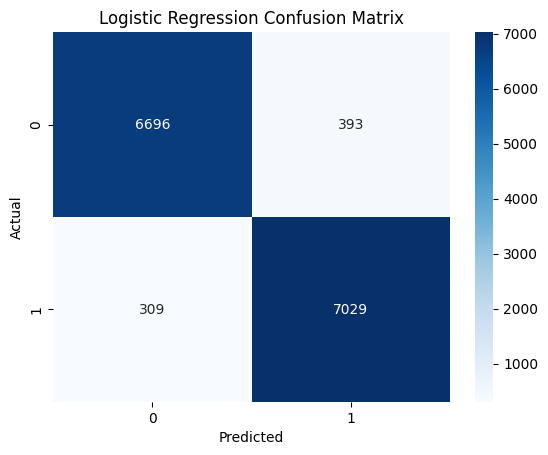

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Train the Classifier ---
print("--- Training Logistic Regression Model ---")
# Initialize the model
log_reg = LogisticRegression(max_iter=1000) # max_iter helps the model converge

# Train the model on the training data
log_reg.fit(X_train, y_train)
print("Training complete.")

# --- 2. Make Predictions ---
print("\n--- Making Predictions on the Test Set ---")
y_pred_lr = log_reg.predict(X_test)

# --- 3. Evaluate Model Performance ---
print("\n--- Evaluating Logistic Regression Performance ---")

# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Plotting the confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

--- Training Random Forest Model ---
(This may take a few moments...)
Training complete.

--- Making Predictions on the Test Set ---

--- Evaluating Random Forest Performance ---
Accuracy: 0.9582

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7089
           1       0.95      0.97      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427


Confusion Matrix:


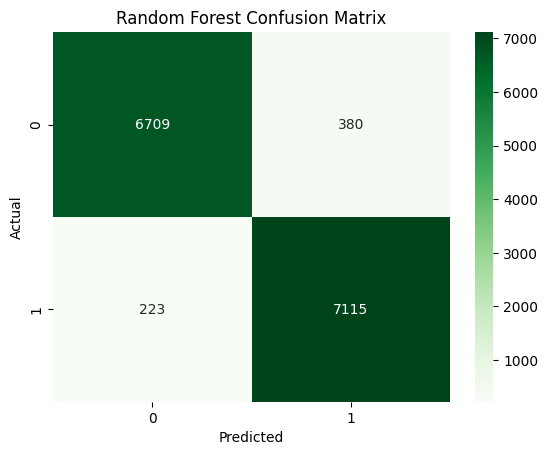

In [18]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Train the Classifier ---
print("--- Training Random Forest Model ---")
print("(This may take a few moments...)")
# Initialize the model
# n_jobs=-1 uses all available CPU cores to speed up training
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
rf.fit(X_train, y_train)
print("Training complete.")

# --- 2. Make Predictions ---
print("\n--- Making Predictions on the Test Set ---")
y_pred_rf = rf.predict(X_test)

# --- 3. Evaluate Model Performance ---
print("\n--- Evaluating Random Forest Performance ---")

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plotting the confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Choosing best model 

while comparing the accurary of the models, 
we can see that the model with the highest accuracy is the model with the highest value is Random Forest Classifier with an accuracy of 0.96 than Logistic Regression with an accuracy of 0.95


In [19]:
import joblib

# This cell assumes you have:
# rf: Your trained RandomForestClassifier object
# vectorizer: Your trained TfidfVectorizer object (this is the key change)

# --- Save the Random Forest Model ---
# This line was already correct
joblib.dump(rf, 'fake_news_model.pkl')

# --- Save the TF-IDF Vectorizer ---
# The fix is to use the correct variable name: 'vectorizer' instead of 'tfidf_vectorizer'
joblib.dump(vectorizer, 'vectorizer.pkl')

print("--- Files Saved Successfully using joblib ---")
print("1. fake_news_model.pkl")
print("2. vectorizer.pkl")

--- Files Saved Successfully using joblib ---
1. fake_news_model.pkl
2. vectorizer.pkl


Checking the distribution of labels in the dataset:
label
1    37106
0    35028
Name: count, dtype: int64


C:\Users\Hari\AppData\Local\Temp\ipykernel_19800\4188934691.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=final_df, palette='viridis')


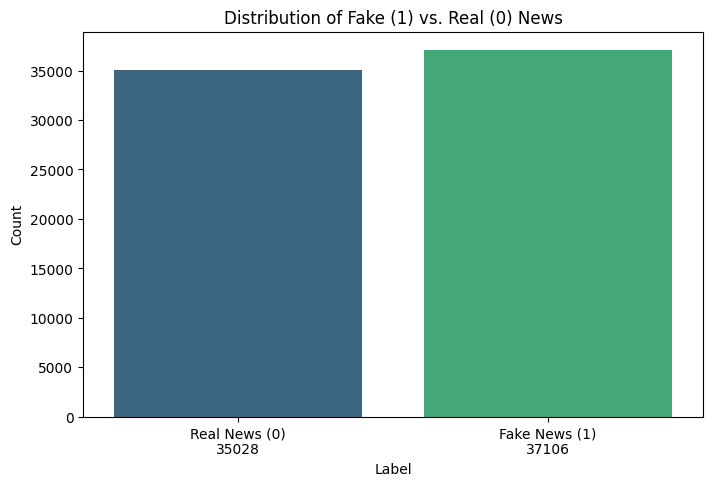

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Check for Class Imbalance ---
print("Checking the distribution of labels in the dataset:")
label_counts = y.value_counts()
print(label_counts)

# Plot the distribution to visually confirm the imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=final_df, palette='viridis')
plt.title('Distribution of Fake (1) vs. Real (0) News')
plt.xlabel('Label')
plt.ylabel('Count')
# Use the actual counts in the labels for clarity
plt.xticks(ticks=[0, 1], labels=[f'Real News (0)\n{label_counts[0]}', f'Fake News (1)\n{label_counts[1]}'])
plt.show()